# Introductory Data Analysis with Python

PyDays Vienna, 2018-05-05

Stefan Seelmann, Christine Koppelt

## Introduction

### About us

Stefan (<mail@stefan-seelmann.de>)
* Software developer
* Works at [SimScale](https://www.simscale.com/)
* Introduced Jupyter as tool at work

Christine (<christine.koppelt@innoq.com>)
* Software developer
* Works at [INNOQ](https://www.innoq.com/)
* Organizes [Data Engineering Meetup Munich](https://www.meetup.com/de-DE/data-engineering-munich/)

### Agenda

* 5 Parts:
    * Getting used to Jupyter
    * Pandas overview & Basic functions
    * Descriptive statistics
    * DataFrame operations
    * Time series
* For each part:
    * Short introduction by us (with dummy data)
    * Then exercise by you (with a provided data set)

### Teaser

![boxplot](img/boxplot.png)
![hist](img/hist.png)


### Course Materials

Git repository with notebooks & installation instruction:    
[https://gitlab.com/seelmann/jupyter-workshop-pyvie2018](https://gitlab.com/seelmann/jupyter-workshop-pyvie2018)

### About the Data Set

* From a Kaggle competition: https://www.kaggle.com/c/rossmann-store-sales/data
* Store and sales data of Rossmann (German grocery store, Drogeriemarkt)
    * `data/rossmann/store.csv`
    * `data/rossmann/train.csv` (train because it's the "training" data set)


## Jupyter Overview

### Demo


* Jupyter Notebook and Lab
* File browser
* Kernel management
* Notebooks
* Cell types: code and markdown
* Presentation
* Tab completion and help
* Console
* Command Reference

### Project Jupyter

>The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text.
>
><cite>https://jupyter.org/</cite>

* Origin: iPython, iPython Notebook
* Open source, BSD license
* Started in 2014 by Fernando Pérez, assistant professor in the Department of Statistics at UC Berkeley
* Supported by Microsoft, Google and several foundations
* Very popular in the data analysis / data science / machine learning space
* Supports ~50 languages: Python, R, Julia, Scala, ...
* Similar software: MATLAB, Mathematica, R Studio, Tableau, PowerBI, Excel

### Ecosystem, Tools, Libraries

* Notebook and Lab
* Languages and Kernels
* ipywidgets, interactive
* nbviewer
* nbconvert
* RISE, nbpresent
* Sphinx, Latex
* Hub

### Architecture
![](http://jupyter.readthedocs.io/en/latest/_images/notebook_components.png)

### Use Cases

* Data analysis, data exploration, machine learning
* Data query tool (for debugging or for support)
* Python in the browser
* Publishing and sharing
* Presentations
* Not: software development

### Try it out

* MyBinder: https://jupyter.org/try
* Viewer: https://nbviewer.jupyter.org/
* Google Colaboratory: https://colab.research.google.com/notebooks/welcome.ipynb
* Microsoft: https://notebooks.azure.com/

### Run Cells

* Run and stay at current cell: `Ctrl+Enter`
* Run and advance to next cell: `Shift+Enter`
* Run all cells in a notebook -> Menu

### Manage Cells

* Switch between command and edit mode: `Enter`, `ESC`/`Ctrl+M`
* In command mode:
    * Delete cell: `dd`
    * Add cell before `a` or after `b` current cell
    * Copy cell: `c` + `v`
    * Change cell type: markdown `m`, code `y`, raw `r`

### Code Completion and Help

* Code completion: `Tab`
* Python docstring: `Shift+Tab` (repeated)
* Help
    * `?`: generic help
    * `?object`: docstring of the class or function
    * `??object`: source code of module or class or function
* Doesn't work so well for built-ins

### Keeping notebooks under version control
* Notebook saved as well structured JSON file
* But: Output numbers and output content changes with each execution
* Recommendation for collaboration: Check-in notebooks with cleaned output

## Exercise 1 - Jupyter

Goals: 
* Have a working Jupyter environment ready
* Getting familiar with Jupyter

Tasks:
* Create a notebook file, create some code cells, write some Python code, and execute it
* Create a markdown cell
* Try some shortcuts:
    * Execute a cell: `Ctrl+Enter` and `Shift+Enter`
    * Create a cell before `a` or after `b`
    * Copy `c` and paste `v` a cell
* Try code completion and help
    * `Tab`
    * `Shift+Tab`
    * ?python module or class or function

## Pandas

### Pandas

* Python library (can be used independent of Jupyter)
* Data structues and tools for data analysis (in-memory)
* Tabluar data and time series
* Homepage: https://pandas.pydata.org/
* Documentation: https://pandas.pydata.org/pandas-docs/stable/

### Pandas and friends

* NumPy: large array and matrices, numeric operations
* Plots and visualization: matplotlib, bokeh, seaborn, ...
* Machine learning, Deep learning: scikit-learn, tensorflow, PyTorch, ...

### Default imports

* Aliases `np`, `pd`, `plt` are very common.
* `%matplotlib inline` tells Jupyter to render plots inline
* `plt.rcParams["figure.figsize"] = [10,4]` makes the plots a bit larger

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,4]

### Pandas Data Structure: Series

One-dimensional labeled array

In [52]:
pd.Series({'a' : 1.0, 'b' : 2.4, 'c' : 3.7})

a    1.0
b    2.4
c    3.7
dtype: float64

### Pandas Data Structure: DataFrame

* Two-dimensional, like a spreadsheet or SQL table
* Rows have an _index_
* Columns have a _label_ and a _data type_
* Commonly used variable name: `df`

In [53]:
df = pd.DataFrame({'somecat' : ['a', 'b', 'b', 'a'],
  'somedate': [pd.datetime.utcnow(), pd.datetime(2000,1,1), None, None],
  'somefloat' : [1.4, 1.23456789e-5, None, np.pi],
  'someint' : [-1, 0, 42, 1000],
  'sometext': ['foo', 'bar', 'baz', None]})
df

somecat                   somedate  somefloat  someint sometext
0       a 2018-05-06 17:58:40.283808   1.400000       -1      foo
1       b 2000-01-01 00:00:00.000000   0.000012        0      bar
2       b                        NaT        NaN       42      baz
3       a                        NaT   3.141593     1000     None

### DataFrame: data types

In [54]:
df.dtypes

somecat              object
somedate     datetime64[ns]
somefloat           float64
someint               int64
sometext             object
dtype: object

### DataFrame: head, tail, sample

In [55]:
df.head(2)

somecat                   somedate  somefloat  someint sometext
0       a 2018-05-06 17:58:40.283808   1.400000       -1      foo
1       b 2000-01-01 00:00:00.000000   0.000012        0      bar

In [56]:
df.tail(2)

somecat somedate  somefloat  someint sometext
2       b      NaT        NaN       42      baz
3       a      NaT   3.141593     1000     None

In [57]:
df.sample(2)

somecat                   somedate  somefloat  someint sometext
3       a                        NaT   3.141593     1000     None
0       a 2018-05-06 17:58:40.283808   1.400000       -1      foo

### DataFrame: dimensions

* `shape`: number of rows and columns
* `count()`: number of values per column (excluding `None`)

In [58]:
df.shape

(4, 5)

In [59]:
df.count()

somecat      4
somedate     2
somefloat    3
someint      4
sometext     3
dtype: int64

## Data Import and Export

### Data Export

* Pandas DataFrame has many `to_*` functions for exporting data
* Writes to file if path is provided
* Many options to specify format:
    * JSON: orient, date formatting, ...
    * CSV: separator, column order, ...
    * SQL: replace, append, data type mapping, ...

In [60]:
df.to_json('data/demo.json', orient='records')
df.to_json()

'{"somecat":{"0":"a","1":"b","2":"b","3":"a"},"somedate":{"0":1525629520283,"1":946684800000,"2":null,"3":null},"somefloat":{"0":1.4,"1":0.0000123457,"2":null,"3":3.1415926536},"someint":{"0":-1,"1":0,"2":42,"3":1000},"sometext":{"0":"foo","1":"bar","2":"baz","3":null}}'

In [61]:
df.to_csv('data/demo.csv', index=False)
df.to_csv()

',somecat,somedate,somefloat,someint,sometext\n0,a,2018-05-06 17:58:40.283808,1.4,-1,foo\n1,b,2000-01-01 00:00:00.000000,1.23456789e-05,0,bar\n2,b,,,42,baz\n3,a,,3.141592653589793,1000,\n'

### Data Import

* Pandas has many `read_*` functions for importing data into a DataFrame
    * CSV, SQL (query or table), JSON, XML
* CSV:
    * Tries to automagically detect: separators, column names, data types
    * Fails sometimes, but can be defined explicitely
    * Parsing of dates needs to be defined explicitely
* SQL:
    * Requires connection to database

In [62]:
df = pd.read_csv('data/demo.csv', parse_dates=['somedate'])

## Exercise 2 - Pandas overview & Basic functions

Goals: 
* Be able to read data from into a Pandas DataFrame
* Get a brief overview about the data

Tasks:
* Open and inspect the Rossmann sample data with the Jupyter web interface
* Import store.csv and train.csv (sales) data as Data Frame
    * Observe the warning when reading _sales_ data
* Explore the data briefly:
    * Print the ten first/last/random stores and sales
    * What are the data types of the columns?
    * How many rows and colums are in the data sets?
    * How many null/NaN values are in the data sets?
* Write _store_ data to a JSON file

### Exercise 2 - Bonus Tasks

* Fix the warning when reading _sales_ data
* Write to and read from SQL (sqlite)
* Why are some numeric values converted to int64 while others are converted to float64?

## Explore Data

### Selecting columns

If only some columns are required for further processing.

In [63]:
df[['somecat','someint']]

somecat  someint
0       a       -1
1       b        0
2       b       42
3       a     1000

### Filter Rows by Boolean Indexing

https://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing

In [64]:
df.loc[(df.somecat == 'b') | (df.someint > 100)]

somecat   somedate  somefloat  someint sometext
1       b 2000-01-01   0.000012        0      bar
2       b        NaT        NaN       42      baz
3       a        NaT   3.141593     1000      NaN

### Filter Rows by Query

https://pandas.pydata.org/pandas-docs/stable/indexing.html#the-query-method-experimental

In [65]:
df.query('somecat == "b" or someint > 100')

somecat   somedate  somefloat  someint sometext
1       b 2000-01-01   0.000012        0      bar
2       b        NaT        NaN       42      baz
3       a        NaT   3.141593     1000      NaN

### N largest / smallest

* Get the rows with the **n** largest or smallest values of a column.

In [66]:
df.nlargest(2, 'someint')

somecat somedate  somefloat  someint sometext
3       a      NaT   3.141593     1000      NaN
2       b      NaT        NaN       42      baz

In [67]:
df.nsmallest(2, 'somefloat')

somecat                   somedate  somefloat  someint sometext
1       b 2000-01-01 00:00:00.000000   0.000012        0      bar
0       a 2018-05-06 17:58:40.283808   1.400000       -1      foo

## Descriptive Statistics

### Describe

* Generates various summary statistics, excluding NaN.
* By default numeric columns only
* Can be changed by defining `include`

In [68]:
df.describe()

somefloat      someint
count   3.000000     4.000000
mean    1.513868   260.250000
std     1.573883   493.573618
min     0.000012    -1.000000
25%     0.700006    -0.250000
50%     1.400000    21.000000
75%     2.270796   281.500000
max     3.141593  1000.000000

### Describe

* Generates various summary statistics, excluding NaN.
* By default numeric columns only
* Can be changed by defining `include`

In [69]:
df.describe(include=[np.object,np.bool,np.datetime64])

somecat                    somedate sometext
count        4                           2        3
unique       2                           2        3
top          a  2018-05-06 17:58:40.283808      bar
freq         2                           1        1
first      NaN         2000-01-01 00:00:00      NaN
last       NaN  2018-05-06 17:58:40.283808      NaN

### Single Summaries

* Many functions to calculate summaries
* mean, min, max, median, quantiles, std, var, count, sum, ...

In [70]:
df.sum()

somefloat       4.541605
someint      1041.000000
dtype: float64

### Grouped Summaries

* Works also for grouped data
* mean, min, max, median, quantiles, std, var, count, sum, ...

In [71]:
df.groupby('somecat').sum()

somefloat  someint
somecat                    
a         4.541593      999
b         0.000012       42

### Histograms

* Draw histogram of the DataFrame's series using matplotlib / pylab.
* By default 10 bins.
* Frequency of values within the dataset
* Hint: trailing semicolon supresses output

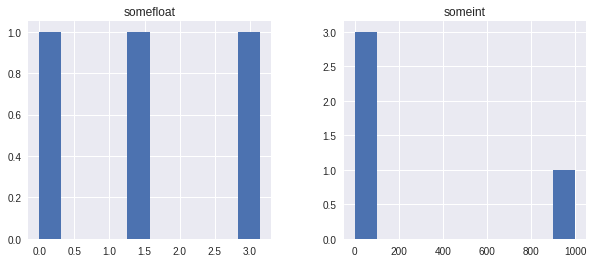

In [72]:
df.hist();

### Boxplot

* Visualizes the distribution of values

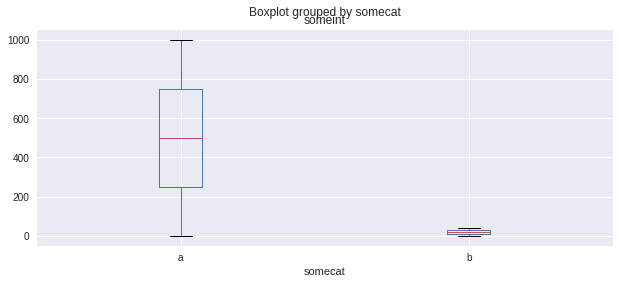

In [73]:
df.boxplot(column='someint', by='somecat');

## Exercise 3 - Descriptive Statistics

Goals:
* Explore a data set
* Determine descritive statistics

Tasks:
* Get the number of stores per store type
* Get the number of stores per assortment
* Determine the number of stores which have a competitor within 5 km
* Calculate min, max, and mean distance to the nearest competitor
* Plot a histogram of the distance to competitors
* Plot sales and number of customers per weekday
* Boxplot with sales per weekday

## Exercise 3 - Bonus Tasks

* Sales per store: min, avg, max, median
* Plot a histogram with sales per store, using 50 bins
* Play with the describe() function

## Modifying a DataFrame

### Modifying a DataFrame

* Selection often return a _view_
    * When modifying such a _view_ a warning is printed
    * Explicit `copy()` possible
* Functions that modify data don't modify the DataFrame but return a copy
    * Many functions have an `inplace` parameter which is `False` by default

### Data Cleaning

* Fill gaps: 
    * Interpolate
    * Padding or backfill
    * Fill with default vlaue
    * Drop row
* Drop duplicates

In [74]:
df2 = df.copy()
df2.somefloat.interpolate(inplace=True)
df2.sometext.fillna(method='ffill', inplace=True)
df2.fillna(0, inplace=True)
df2.dropna(inplace=True)
df2.drop_duplicates('somedate', inplace=True)
df2

somecat                   somedate  somefloat  someint sometext
0       a 2018-05-06 17:58:40.283808   1.400000       -1      foo
1       b 2000-01-01 00:00:00.000000   0.000012        0      bar
2       b 1970-01-01 00:00:00.000000   1.570802       42      baz

### Add columns

In [75]:
df3 = df2.copy()
df3['newtext'] = 'abc'
df3['newint'] = df3['somefloat'].pow(df3.someint).astype(np.int64)
df3

somecat                   somedate  somefloat  someint sometext newtext  \
0       a 2018-05-06 17:58:40.283808   1.400000       -1      foo     abc   
1       b 2000-01-01 00:00:00.000000   0.000012        0      bar     abc   
2       b 1970-01-01 00:00:00.000000   1.570802       42      baz     abc   

      newint  
0          0  
1          1  
2  172626122

### Combine DataFrames

In [76]:
other_df = pd.DataFrame({
  'date': [pd.datetime(2000,1,1), pd.datetime(2000,1,2), pd.datetime(2000,1,3),
    pd.datetime(2000,1,1), pd.datetime(2000,1,2), pd.datetime(2000,1,3),
    pd.datetime(2000,1,1), pd.datetime(2000,1,2), pd.datetime(2000,1,3),],
  'key' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar', 'baz', 'baz', 'baz']})
merged_df = pd.merge(left=other_df, right=df3[['somecat','somefloat','someint','sometext']], left_on='key', right_on='sometext')
merged_df

date  key somecat  somefloat  someint sometext
0 2000-01-01  foo       a   1.400000       -1      foo
1 2000-01-02  foo       a   1.400000       -1      foo
2 2000-01-03  foo       a   1.400000       -1      foo
3 2000-01-01  bar       b   0.000012        0      bar
4 2000-01-02  bar       b   0.000012        0      bar
5 2000-01-03  bar       b   0.000012        0      bar
6 2000-01-01  baz       b   1.570802       42      baz
7 2000-01-02  baz       b   1.570802       42      baz
8 2000-01-03  baz       b   1.570802       42      baz

## Exercise 4 - Modifying a DataFrame

Goals:
* Data cleaning
* Add columns
* Combine data frames

Tasks:
* Read `date` column in _sales_ data  as date (datetime64)
* Calculate CompetitionOpenSince date from month and year columns (datetime64)
* Fill missing CompetitionDistance with average value of all distances
* Fill missing Competition date with today's date
* Replace StateHoliday categories a, b, c with 1 and convert to int32
* Join store type, assortment, distance and open since from store df to sales df
* Plot average sales and number of customers per store type

## Exercise 4 - Bonus Task

* Find correlations and plot a heat map

## Time Series

### Set Time Index

In [77]:
ts = merged_df.set_index('date')
ts

key somecat  somefloat  someint sometext
date                                                
2000-01-01  foo       a   1.400000       -1      foo
2000-01-02  foo       a   1.400000       -1      foo
2000-01-03  foo       a   1.400000       -1      foo
2000-01-01  bar       b   0.000012        0      bar
2000-01-02  bar       b   0.000012        0      bar
2000-01-03  bar       b   0.000012        0      bar
2000-01-01  baz       b   1.570802       42      baz
2000-01-02  baz       b   1.570802       42      baz
2000-01-03  baz       b   1.570802       42      baz

### Resample

* Downsample and/or unify the frequency of the time steps
* Need to aggregate the values (sum, mean)

In [78]:
ts.resample('2D').mean()

somefloat    someint
date                            
2000-01-01   0.990272  13.666667
2000-01-03   0.990272  13.666667

### Reshaping - Pivot

* Reshape, e.g. for record-based CSV data

In [79]:
ts.pivot(columns='key', values='somefloat')

key              bar       baz  foo
date                               
2000-01-01  0.000012  1.570802  1.4
2000-01-02  0.000012  1.570802  1.4
2000-01-03  0.000012  1.570802  1.4

### Reshaping - Unstack

* Like pivot, for multi-index objects
* Multi-index objects occur when grouping and aggregating data

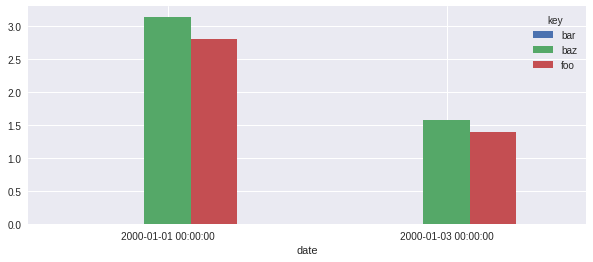

In [80]:
ts.groupby('key').resample('2D')['somefloat'].sum().unstack('key').plot.bar(rot=0);
#ts.groupby('key').resample('2D')['somefloat'].sum().unstack('key')

## Exercise 5 - Time Series

Goals:
* Work with time series data

Tasks:
* Set the 'Date' column as index 
* Plot sales per month
* Plot sales per quarter, per store type

Bonus task:
* Plot sales per N month interactive

## End